# Disciplina Machine Learning e Deep Learning

## Projeto em equipe
### Classificação de imagens de amostras positivas/negativas para Sauron
Prazo de Entrega: 12/01/2026

## Descrição

De acordo com o Ministério da Saúde de Areia-Média, a Sauron *(1)* é uma doença infecciosa, causada por vírus e transmitida por contato a flecha do Orcas. A doença tem cura e o tratamento é eficaz, porém pode haver evolução para formas graves se não for diagnosticada e tratada precocemente.

Você foi convidado pela ONG "Elfos Muito Legais *(2)*" para participar de um projeto de identificação automática de células infectadas pela doença Sauron. A ONG disponibilizou um Dataset de imagens de amostras de lâminas de sangue.

As imagens podem ser obtidas através do link: https://drive.google.com/file/d/1DMCJ1rxdp5uTifqChdlJlYX16I8l2H5A/view?usp=sharing

O Dataset possui uma pasta "Imagens_Supeita_Sauron" contendo as subpastas "Positivo" e "Negativo" com 13780 imagens cada.

Exemplo de uma imagem de amostra com resultado Negativo para Sauron:

<img src="https://drive.google.com/uc?export=view&id=1abrawMoLenFjUExYKxYYvCW2wivYwI8t" alt="drawing" width="100"/>

Exemplo de uma imagem de amostra com resultado Positivo para Sauron:

<img src="https://drive.google.com/uc?export=view&id=1tsyWUHgFrFpDdnMOFGpZwUtSHeDByCyY" alt="drawing" width="100"/>


--

*(1) (2) - A ONG e a doença são fictícias*

##Classificação através de uma CNN

1. Separe o dataset em pelo menos 80% para treino, 10% para validaçao e 10% para teste.

2. Use data augmentation para aprimorar a acurácia da CNN.

3. Construa uma CNN com duas camadas (Convolução/Pooling) e outra CNN com mais camadas para classificar as imagens em positivas ou negativas para Sauron.

4. Inclua um 2o arquivo notebook com a aplicação da técnica de Fine Tuning, utilizando um modelo pré treinado, diferente do VGG16, adequado ao tipo de dado do problema (faça uma busca nos repositórios vistos em sala ou outros). Se organizem para cada equipe usar um modelo pré-treinado diferente.

5. Compare os resultados

  - Exiba os gráficos da evolução da acurácia e da perda do treino e da validação.

  - O melhor modelo final deve ter uma acurácia superior a 85% no dataset de teste.

6. Salve o melhor modelo em um arquivo apropriado.

Obs.: Inclua comentários no código fonte e textos no notebook com as explicações de como foi feito. Poste o arquivo do notebook na resposta da atividade no google Classroom junto com o link do video no youtube onde vocês precisarão explicar como foi feito e os resultados obtidos.

**Importante:**

0. O Dataset de validação normalmente é utilizado para identificar os melhores hiperparâmetros do modelo.
1. **Reduza o tamanho do Dataset de treino e validação, enquanto está identificando os melhores hiperparâmetros.** Assim, o treinamento será mais rápido nesta etapa.
2. Quando encontrar os melhores hiperparâmetros, use o tamanho original dos Datasets para o treinamento final.
3. O dataset de teste deve ser utilizado com os métodos evaluate depois do treinamento.
4. Não esqueça de configurar a **GPU no notebook** do Google Colab

_____________________________________________________________________________________________

In [ ]:
# 1. Montar o Google Drive
from google.colab import drive
drive.mount('/content/drive')

# 2. Importar bibliotecas
!pip install tensorflow
!pip install -q -U keras-tuner
import keras_tuner as kt
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import os
!pip install -q -U keras-tuner
import keras_tuner as kt

# Caminho para a sua pasta
# base_dir = '/content/drive/MyDrive/Imagens_Supeita_Sauron'
# Devido a demora para o treino usarei o arquivo lido diretamente

import zipfile

# Caminho do zip no Drive
zip_path = '/content/drive/MyDrive/Imagens_Supeita_Sauron.zip'
extract_path = '/content/dataset_local'

# Descompactando no disco local do Colab
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Atualize seu base_dir para a pasta local
base_dir = '/content/dataset_local/Imagens_Supeita_Sauron'

# Verificar se encontrou as pastas
print("Conteúdo da pasta:", os.listdir(base_dir))

Mounted at /content/drive
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.7/620.7 MB 735.5 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 93.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 119.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 120.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.0/225.0 kB 17.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 7.8 MB/s eta 0:00:00


/usr/local/lib/python3.12/dist-packages/jax/_src/cloud_tpu_init.py:86: UserWarning: Transparent hugepages are not enabled. TPU runtime startup and shutdown time should be significantly improved on TPU v5e and newer. If not already set, you may need to enable transparent hugepages in your VM image (sudo sh -c "echo always > /sys/kernel/mm/transparent_hugepage/enabled")
  warnings.warn(


Conteúdo da pasta: ['Positivo', 'Negativo']


In [ ]:
BATCH_SIZE = 32
IMG_SIZE = (150, 150) # Redimensionamos as imagens para ficarem iguais

# 1. Carregar TUDO primeiro (apenas para referência, não vamos usar esse objeto diretamente para treino)
dataset_total = tf.keras.utils.image_dataset_from_directory(
    base_dir,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True,
    seed=123,
    label_mode='binary' # Porque são só 2 classes: Positivo ou Negativo
)

# 2. Função para dividir o dataset
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)

    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds

# Aplicando a divisão
train_dataset, val_dataset, test_dataset = get_dataset_partitions_tf(dataset_total)

# Otimização de performance (cache na memória)
AUTOTUNE = tf.data.AUTOTUNE
train_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_dataset = val_dataset.cache().prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.cache().prefetch(buffer_size=AUTOTUNE)

print("Datasets prontos!")

Found 27558 files belonging to 2 classes.
Datasets prontos!


In [ ]:
data_augmentation = tf.keras.Sequential([
  layers.Rescaling(1./255), # Normaliza os pixels de 0-255 para 0-1 (ajuda a matemática da rede)
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
  layers.RandomZoom(0.2),
])

In [ ]:
model_simple = models.Sequential([
    # Camada de entrada + Augmentation
    layers.InputLayer(input_shape=(150, 150, 3)),
    data_augmentation,

    # Bloco 1
    layers.Conv2D(32, (3, 3), activation='relu'), # 32 filtros detectando padrões
    layers.MaxPooling2D(2, 2), # Reduz o tamanho da imagem pela metade (foca no principal)

    # Bloco 2
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    # Classificação (Parte densa)
    layers.Flatten(), # Transforma a matriz 2D num vetor 1D
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid') # Saída única (0 ou 1) pois é classificação binária
])

model_simple.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model_simple.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 82944)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     5,308,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,327,937 (20.32 MB)

 Trainable params: 5,327,937 (20.32 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_deep = models.Sequential([
    layers.InputLayer(input_shape=(150, 150, 3)),
    data_augmentation,

    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dropout(0.5), # Desliga 50% dos neurônios aleatoriamente para evitar o overfiting
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model_deep.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model_deep.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,453,121 (13.17 MB)

 Trainable params: 3,453,121 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 1. Calcular o tamanho total em batches
total_batches_train = len(train_dataset)
total_batches_val = len(val_dataset)

# 2. Definir quantos batches são 2% (mínimo de 1)
steps_train = int(total_batches_train * 0.02)
if steps_train == 0: steps_train = 1 # Garante que rode pelo menos 1

steps_val = int(total_batches_val * 0.02)
if steps_val == 0: steps_val = 1

print(f"Treinando com {steps_train} passos por época (Dataset reduzido)")

# 3. Criar os datasets reduzidos
train_ds_small = train_dataset.take(steps_train)
val_ds_small = val_dataset.take(steps_val)

# 4. Treinar passando o 'verbose=1' explicitamente
history_simple = model_simple.fit(
    train_ds_small,
    validation_data=val_ds_small,
    epochs=15,
    verbose=1  # Força a mostrar a barra de progresso
)

Treinando com 13 passos por época (Dataset reduzido)
Epoch 1/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 19s 967ms/step - accuracy: 0.5200 - loss: 1.6399 - val_accuracy: 0.5000 - val_loss: 0.6927
Epoch 2/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 915ms/step - accuracy: 0.5462 - loss: 0.6912 - val_accuracy: 0.5625 - val_loss: 0.6855
Epoch 3/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 914ms/step - accuracy: 0.6206 - loss: 0.6765 - val_accuracy: 0.6875 - val_loss: 0.6668
Epoch 4/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 906ms/step - accuracy: 0.6476 - loss: 0.6690 - val_accuracy: 0.5625 - val_loss: 0.6751
Epoch 5/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 907ms/step - accuracy: 0.6145 - loss: 0.6657 - val_accuracy: 0.6875 - val_loss: 0.6317
Epoch 6/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 892ms/step - accuracy: 0.6364 - loss: 0.6549 - val_accuracy: 0.7188 - val_loss: 0.5449
Epoch 7/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 908ms/step - accuracy: 0.7162 - loss: 0.6150 - val_accuracy: 0.6875 - val_loss: 0.5865
Epoch 8/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 90

In [ ]:
# 5. Treinar agora o deep
history_deep = model_deep.fit(
    train_ds_small,
    validation_data=val_ds_small,
    epochs=15,
    verbose=1
)

Epoch 1/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.5266 - loss: 0.7254 - val_accuracy: 0.5938 - val_loss: 0.6850
Epoch 2/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.5218 - loss: 0.6929 - val_accuracy: 0.5625 - val_loss: 0.6903
Epoch 3/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.5940 - loss: 0.6857 - val_accuracy: 0.4375 - val_loss: 0.8455
Epoch 4/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.5074 - loss: 0.7414 - val_accuracy: 0.3750 - val_loss: 0.7140
Epoch 5/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.5496 - loss: 0.6822 - val_accuracy: 0.4688 - val_loss: 0.6868
Epoch 6/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.5408 - loss: 0.6888 - val_accuracy: 0.5938 - val_loss: 0.6755
Epoch 7/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.6631 - loss: 0.6661 - val_accuracy: 0.9062 - val_loss: 0.6041
Epoch 8/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.8731 - loss: 0.4561 - val_accuracy: 0.8750 - val_loss:

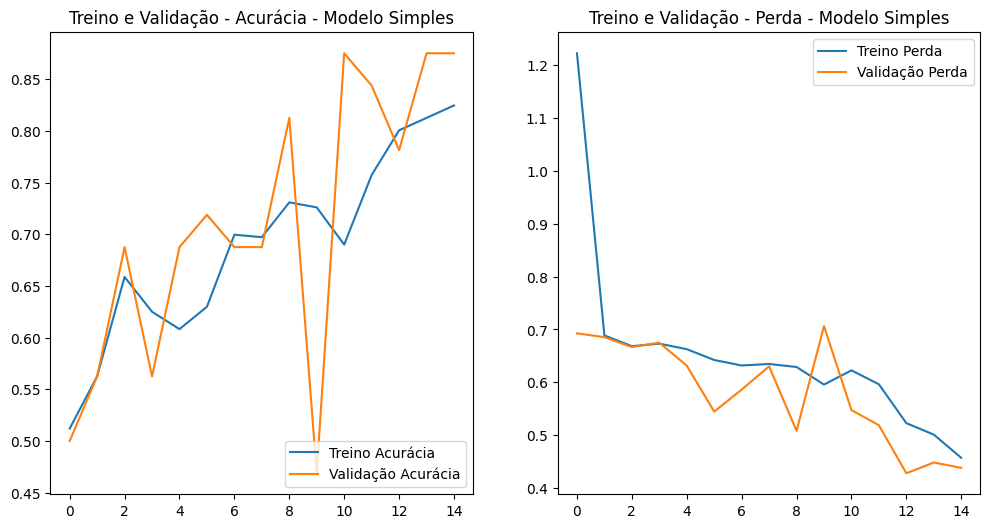

In [ ]:
acc_simple = history_simple.history['accuracy']
val_acc_simple = history_simple.history['val_accuracy']
loss_simple = history_simple.history['loss']
val_loss_simple = history_simple.history['val_loss']

epochs_range = range(15)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc_simple, label='Treino Acurácia')
plt.plot(epochs_range, val_acc_simple, label='Validação Acurácia')
plt.legend(loc='lower right')
plt.title('Treino e Validação - Acurácia - Modelo Simples')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss_simple, label='Treino Perda')
plt.plot(epochs_range, val_loss_simple, label='Validação Perda')
plt.legend(loc='upper right')
plt.title('Treino e Validação - Perda - Modelo Simples')
plt.show()

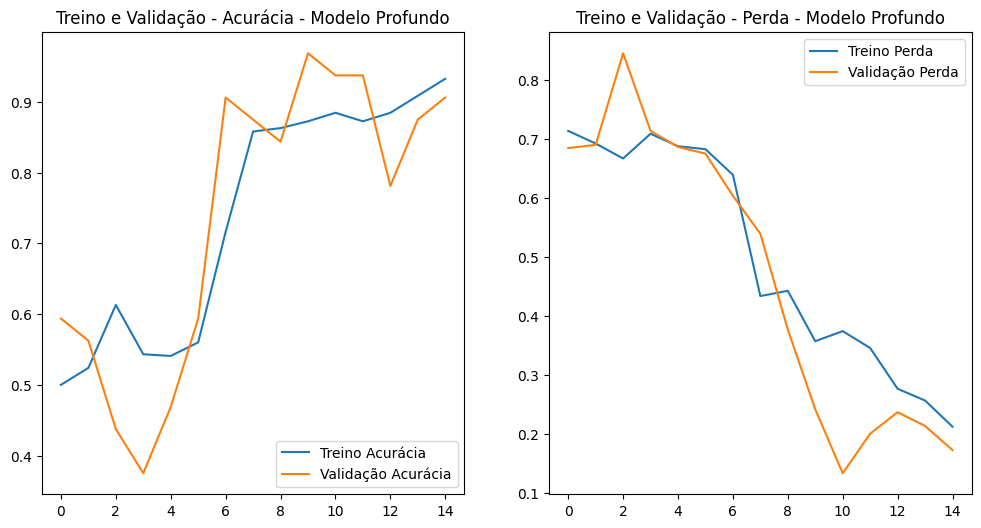

In [ ]:
acc_deep = history_deep.history['accuracy']
val_acc_deep = history_deep.history['val_accuracy']
loss_deep = history_deep.history['loss']
val_loss_deep = history_deep.history['val_loss']

epochs_range = range(15)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc_deep, label='Treino Acurácia')
plt.plot(epochs_range, val_acc_deep, label='Validação Acurácia')
plt.legend(loc='lower right')
plt.title('Treino e Validação - Acurácia - Modelo Profundo')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss_deep, label='Treino Perda')
plt.plot(epochs_range, val_loss_deep, label='Validação Perda')
plt.legend(loc='upper right')
plt.title('Treino e Validação - Perda - Modelo Profundo')
plt.show()

In [ ]:
history_final = model_deep.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=15,
    verbose=1
)

Epoch 1/15
689/689 ━━━━━━━━━━━━━━━━━━━━ 430s 613ms/step - accuracy: 0.7598 - loss: 0.4491 - val_accuracy: 0.9517 - val_loss: 0.1412
Epoch 2/15
689/689 ━━━━━━━━━━━━━━━━━━━━ 415s 602ms/step - accuracy: 0.9402 - loss: 0.1858 - val_accuracy: 0.9586 - val_loss: 0.1280
Epoch 3/15
689/689 ━━━━━━━━━━━━━━━━━━━━ 413s 600ms/step - accuracy: 0.9444 - loss: 0.1704 - val_accuracy: 0.9600 - val_loss: 0.1213
Epoch 4/15
689/689 ━━━━━━━━━━━━━━━━━━━━ 405s 588ms/step - accuracy: 0.9438 - loss: 0.1721 - val_accuracy: 0.9622 - val_loss: 0.1194
Epoch 5/15
689/689 ━━━━━━━━━━━━━━━━━━━━ 388s 562ms/step - accuracy: 0.9497 - loss: 0.1514 - val_accuracy: 0.9622 - val_loss: 0.1206
Epoch 6/15
689/689 ━━━━━━━━━━━━━━━━━━━━ 390s 566ms/step - accuracy: 0.9478 - loss: 0.1549 - val_accuracy: 0.9644 - val_loss: 0.1237
Epoch 7/15
689/689 ━━━━━━━━━━━━━━━━━━━━ 391s 567ms/step - accuracy: 0.9493 - loss: 0.1526 - val_accuracy: 0.9626 - val_loss: 0.1291
Epoch 8/15
689/689 ━━━━━━━━━━━━━━━━━━━━ 397s 576ms/step - accuracy: 0.9503 -

In [ ]:
# Avaliar no dataset de teste (que a rede nunca viu)
loss, accuracy = model_deep.evaluate(test_dataset)
print(f"Acurácia no Teste: {accuracy*100:.2f}%")

if accuracy > 0.85:
    print("Sucesso! O modelo atingiu a meta.")
    model_deep.save('modelo_sauron_final.keras')
else:
    print("Ainda não atingiu 85%. Tente treinar por mais épocas ou ajustar a rede.")

87/87 ━━━━━━━━━━━━━━━━━━━━ 17s 130ms/step - accuracy: 0.9598 - loss: 0.1335
Acurácia no Teste: 96.27%
Sucesso! O modelo atingiu a meta.
